# Detection error tradeoff (DET) curve

we compare two binary classification multi-threshold metrics: the Receiver Operating Characteristic (ROC) and the Detection Error Tradeoff (DET). For such purpose, we evaluate two different classifiers for the same classification task.

ROC curves feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one.

DET curves are a variation of ROC curves where False Negative Rate (FNR) is plotted on the y-axis instead of the TPR. In this case the origin (bottom left corner) is the “ideal” point.


# 1. Generate synthetic data

In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [30]:
pd.DataFrame(X).head()

,0,1
0,1.536830,-1.398694
1,1.369176,-0.637344
2,0.502318,-0.459105
3,1.833193,-1.298082
4,1.042356,1.121529


In [31]:
pd.DataFrame(y).value_counts()

,count
0,
0,500
1,500


# 2. Define the classifiers

 we define two different classifiers. The goal is to visually compare their statistical performance across thresholds using the ROC and DET curves. There is no particular reason why these classifiers are chosen other classifiers available in scikit-learn.


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

In [33]:
classifiers

{'Linear SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearsvc', LinearSVC(C=0.025))]),
 'Random Forest': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)}

# 3. Plot ROC and DET curves

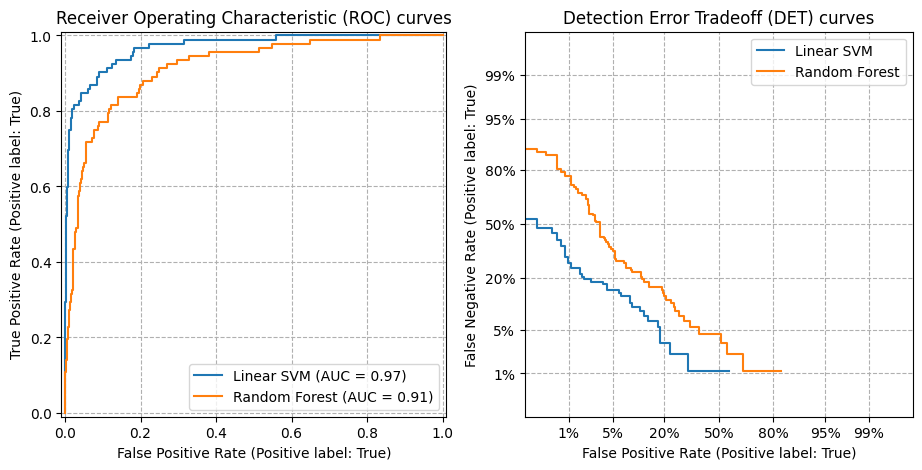

In [38]:
import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

Notice that it is easier to visually assess the overall performance of different classification algorithms using DET curves than using ROC curves. As ROC curves are plot in a linear scale, different classifiers usually appear similar for a large part of the plot and differ the most in the top left corner of the graph. On the other hand, because DET curves represent straight lines in normal deviate scale, they tend to be distinguishable as a whole and the area of interest spans a large part of the plot.

DET curves give direct feedback of the detection error tradeoff to aid in operating point analysis. The user can then decide the FNR they are willing to accept at the expense of the FPR (or vice-versa).